# Come up with your own project!

Define your programming project at a high level (individual or in small groups)!

Here is a recommended outline to get you started:

__Task:__ extract most frequent words / annotations from (sub-)corpora by genre

__Data:__ UD_English-GUM

Now it's your turn:
- pick two genres out of {academic, bio, conversation, court, essay, fiction, interview, letter, news, podcast, speech, textbook, vlog, voyage, whow}
- pick a language feature out of {POS, MORPH, DEPREL, Stopwords, SentenceLength, WordLength}
- formulate a research question and/or hypothesis about
    a) what frequency difference you expect between the two genres and
    b) what this difference could mean (e.g. in terms of how language works, who the authors/audiences are, how we can apply AI to the texts)

- coding: read UD GUM file(s), parse CoNLL format, count feature statistics

__Important:__ Document your code and your coding process, try to answer your research question as much as possible and come up with explanations for your findings, explain difficulties.

In [ ]:
%pip install pandas

In [ ]:
import pathlib
import re

# Specify input and output file paths
input_file = pathlib.Path('UD_English-GUM', 'en_gum-ud-dev.conllu')
output_file = pathlib.Path('UD_English-GUM', 'en_gum-ud-dev-academic-conversation.conllu')

# Initialize variables to track current genre and store relevant lines
current_genre = None
relevant_genres = ['academic', 'conversation']  # The genres we are interested in
buffer = []  # Buffer to hold lines for each document

# Open the input file and a new file to save the filtered data
with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
    for line in infile:
        # Check if the line defines a new genre
        if line.startswith('# meta::genre ='):
            current_genre = line.split('=')[-1].strip()  # Extract the genre from the line

        # If we're in a relevant genre (academic or conversation), store the lines
        if current_genre in relevant_genres:
            buffer.append(line)  # Add the line to the buffer
        
        # If we reach the end of a document (marked by an empty line), write the buffer to file
        if line.strip() == '':  # Empty lines mark the end of a document in CoNLL-U format
            if current_genre in relevant_genres and buffer:
                outfile.writelines(buffer)  # Write the buffer to the output file
            buffer = []  


# POS Tagging Analysis


- ADJ: adjective
- ADP: adposition
- ADV: adverb
- AUX: auxiliary
- CCONJ: coordinating conjunction
- DET: determiner
- INTJ: interjection
- NOUN: noun
- NUM: numeral
- PART: particle
- PRON: pronoun
- PROPN: proper noun
- PUNCT: punctuation
- SCONJ: subordinating conjunction
- SYM: symbol
- VERB: verb
- X: other

In [49]:
# POS Tagging Analysis and the most frequent tag in the academic genre
import pathlib
import pandas as pd
dataset = pathlib.Path('UD_English-GUM', 'en_gum-ud-dev-academic.conllu')
rows = []  # List to store dictionaries of word and POS tag
with open(dataset) as f:               
    for line in f:                    
        line = line.strip()           
        if line.startswith('#'):      
           continue                   
        if line:
            fields = line.split('\t')
            word = fields[1]
            upos = fields[3]
            rows.append({'Word': word, 'POS': upos})

# Create a DataFrame from the list of dictionaries
academic_df_pos = pd.DataFrame(rows)

# Display the DataFrame
print(academic_df_pos)
academic_df_pos.to_csv('academic_df_pos.csv', index=False)


              Word    POS
0     Introduction   NOUN
1         Research   NOUN
2               on    ADP
3            adult   NOUN
4                -  PUNCT
...            ...    ...
1771          this   PRON
1772            in    ADP
1773         other    ADJ
1774      contexts   NOUN
1775             .  PUNCT

[1776 rows x 2 columns]


<Axes: ylabel='count'>

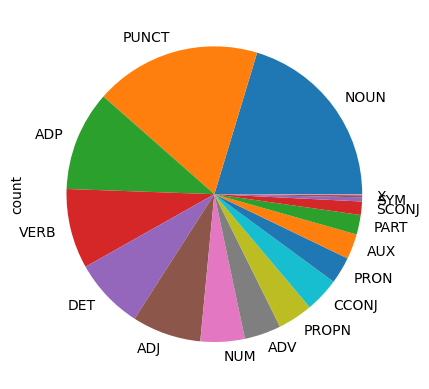

In [50]:
academic_df_pos.value_counts('POS').plot(kind='pie')

In [20]:
academic_df_pos.drop(academic_df_pos[academic_df_pos['POS'] == 'PUNCT'].index, inplace = True)
academic_df_pos.drop(academic_df_pos[academic_df_pos['POS'] == '-'].index, inplace = True)
academic_df_pos.drop(academic_df_pos[academic_df_pos['POS'] == 'X'].index, inplace = True)

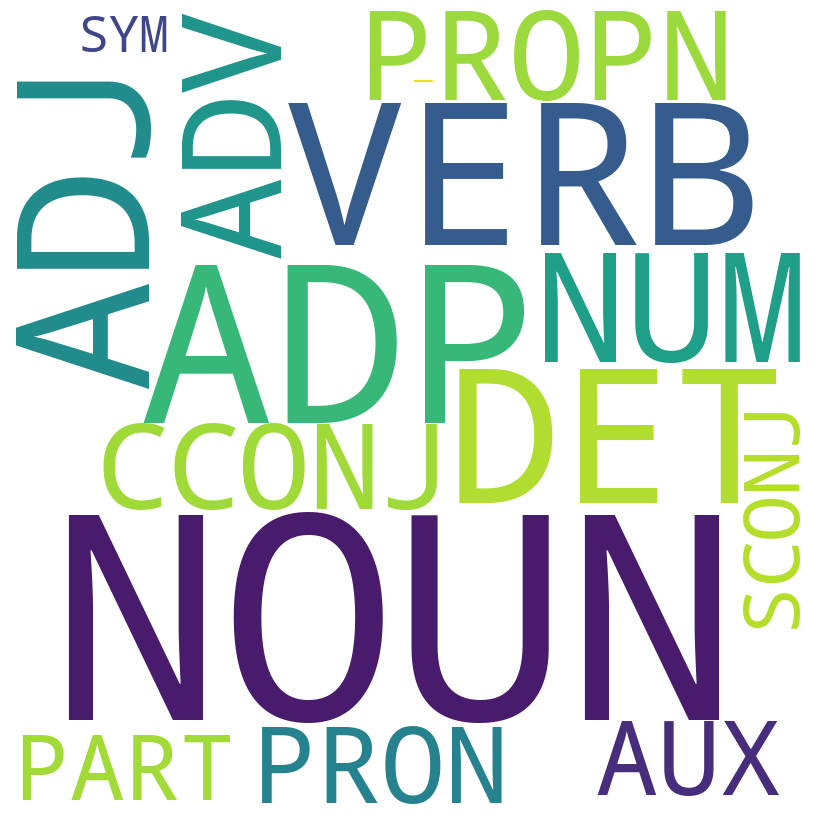

In [30]:
# Wordcloud of the most frequent words in the academic genre
from wordcloud import WordCloud
import matplotlib.pyplot as plt
adcadeic_counts = academic_df_pos['POS'].value_counts().to_dict()
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate_from_frequencies(adcadeic_counts)

# Plotting the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

# Display the word cloud
plt.show()

        Word    POS
0     What'd      _
1       What   PRON
2         'd    AUX
3        you   PRON
4         do   VERB
...      ...    ...
2307     I'm      _
2308       I   PRON
2309      'm    AUX
2310   tired    ADJ
2311       .  PUNCT

[2312 rows x 2 columns]


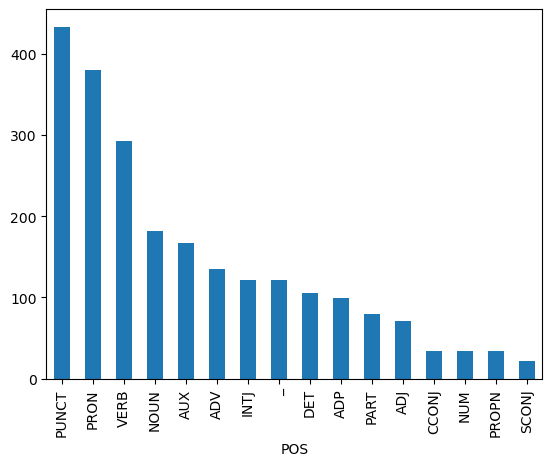

In [47]:
import pathlib
import pandas as pd
dataset = pathlib.Path('UD_English-GUM', 'en_gum-ud-dev-conversation.conllu')
rows = []  # List to store dictionaries of word and POS tag
with open(dataset) as f:               
    for line in f:                    
        line = line.strip()           
        if line.startswith('#'):      
           continue                   
        if line:
            fields = line.split('\t')
            word = fields[1]
            upos = fields[3]
            rows.append({'Word': word, 'POS': upos})
        
# Create a DataFrame from the list of dictionaries
conversation_df_pos = pd.DataFrame(rows)

# Display the DataFrame
print(conversation_df_pos)
conversation_df_pos.value_counts('POS').plot(kind='bar')

conversation_df_pos.to_csv('conversation_df_pos.csv', index=False)



<Axes: ylabel='count'>

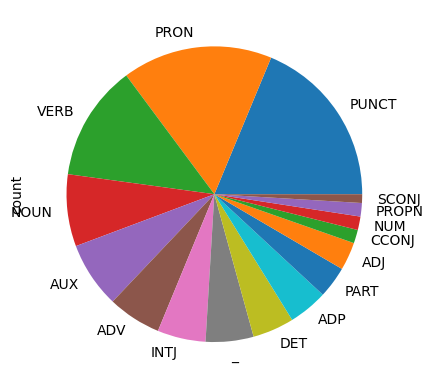

In [48]:
conversation_df_pos.value_counts('POS').plot(kind='pie')



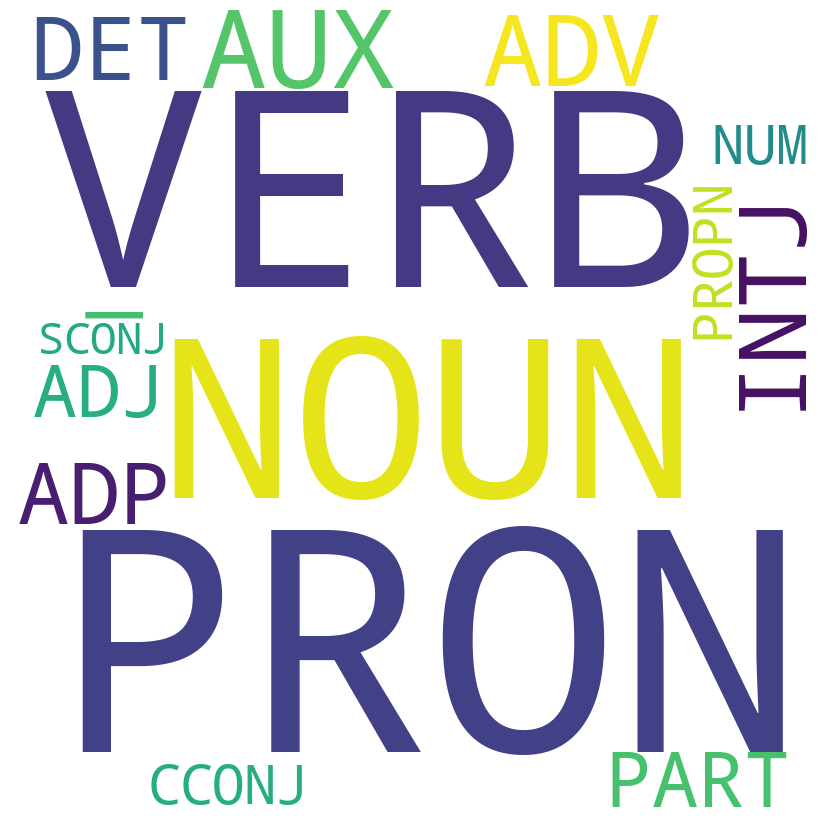

In [31]:
# Wordcloud of the most frequent words in the academic genre
conversation_df_pos.drop(conversation_df_pos[conversation_df_pos['POS'] == 'PUNCT'].index, inplace = True)
conversation_df_pos.drop(conversation_df_pos[conversation_df_pos['POS'] == '-'].index, inplace = True)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
conversation_counts = conversation_df_pos['POS'].value_counts().to_dict()
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate_from_frequencies(conversation_counts)

# Plotting the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

# Display the word cloud
plt.show()

The differences in sentence structures between academic and conversational texts, as reflected in their POS transitions, significantly impact the way meaning is conveyed in each context. Let's break down how the structures influence meaning:

### 1. **Academic Text Structure**:
Academic writing tends to have more formal and complex sentence structures, reflected in patterns like frequent noun-adjective combinations and the prevalence of prepositional phrases. Some notable features:

- **Frequent use of nouns (NOUN) following adjectives (ADJ)**: This reflects a descriptive or analytical nature of academic writing, where adjectives are used to provide specific details or qualifications. For example, "significant research," "detailed analysis." This precision in description enhances clarity and allows for more complex ideas to be communicated.
  
- **High frequency of determiners (DET) preceding nouns (NOUN)**: Determiners such as "the," "a," and "some" often appear in academic texts, helping specify objects or concepts in a clear and unambiguous manner, which is crucial for precise communication.
  
- **Adpositions (ADP) followed by nouns or pronouns**: Prepositional phrases like "on the topic," "in the study" are common, indicating relationships between ideas. This reflects the academic text’s focus on presenting well-structured arguments and logical relationships.

**Impact on Meaning**: These structures provide clarity, precision, and logical organization, making the text more formal and suited to conveying complex and abstract ideas. The reliance on nouns and descriptive phrases supports a more dense and information-rich style, often assuming that the reader is familiar with specialized vocabulary and concepts.

### 2. **Conversational Text Structure**:
Conversational language, on the other hand, is more dynamic and less formal. The transition matrix shows a higher frequency of pronouns, auxiliary verbs, and simpler structures, which reflect the immediacy and personal nature of spoken language.

- **Frequent use of pronouns (PRON) following verbs (VERB)**: Conversational language often uses pronouns like "I," "you," "we," which makes the text more personal and engaging. These structures allow for quick exchanges of information between people.
  
- **High frequency of auxiliary verbs (AUX) preceding pronouns**: Conversational language tends to rely on auxiliaries like "I'm," "you're," "he's," etc. This indicates a strong focus on actions or states, often in a casual and direct manner. For example, "What’d you do?" rather than "What action did you take?"
  
- **Shorter, simpler phrases**: Fewer adjectives and prepositional phrases in conversational text imply that there’s less emphasis on precise descriptions and more focus on getting the point across quickly.

**Impact on Meaning**: Conversational structures are more interactive and context-dependent. The frequent use of pronouns and auxiliary verbs indicates a back-and-forth, often assuming shared knowledge between speakers. The meaning here is less about abstract or precise information and more about maintaining interaction, expressing emotions, or conveying information in a direct and immediate way.

### Key Differences in Impact on Meaning:
- **Academic Text**: Focuses on clarity, precision, and the logical presentation of ideas. The structures used here ensure that meaning is conveyed with as little ambiguity as possible. This results in a denser, more information-rich text, ideal for explaining concepts, making arguments, and presenting evidence.
  
- **Conversational Text**: Prioritizes ease of communication and interaction. Meaning is often conveyed through shared context, tone, and simplicity, making the text more fluid and less structured. The use of pronouns and auxiliary verbs emphasizes personal interaction and immediacy, often reflecting emotions or actions in real-time.

In summary, **academic structures shape meaning through precision and complexity**, while **conversational structures shape meaning through personal connection and simplicity**. The differences in structure align with the different goals of these two types of communication.

# Discourse Relation

In [1]:
import pathlib
import pandas as pd
dataset = pathlib.Path('UD_English-GUM', 'en_gum-ud-dev-academic.conllu')
texts = []  # List to store dictionaries of word and POS tag
with open(dataset) as f:               
    for line in f:                    
        line = line.strip()           
        if line.startswith('# text'):      
          texts.append(line)                     

In [2]:
texts

['# text = Introduction',
 '# text = Research on adult-learned second language (L2) has provided considerable insight into the neurocognitive mechanisms underlying the learning and processing of L2 grammar [1]–[11].',
 '# text = Of interest here, studies suggest that, despite the difficulties in acquiring L2 grammar, adult learners can approximate native-like levels of use and neurocognitive processing [12]–[15].',
 '# text = However, it is not enough to have attained such native-like levels.',
 '# text = Crucially, it is also desirable to retain them, even in the absence of continued practice or exposure to the L2.',
 '# text = In fact, substantial periods (months to years) of limited or no exposure following L2 training are not uncommon, and may even be the norm [16].',
 '# text = Such a scenario may be found in different situations, including when one studies a language in a classroom and then stops taking classes [17], [18] and when one is immersed in a foreign language setting and

In [3]:
academic_text_df = pd.DataFrame(texts, columns=['Text'])

In [4]:
# drop # text = from the text
import re

academic_text_df['Text'] = academic_text_df['Text'].apply(lambda x: re.sub(r'# text =\s*', '', x))

print("Cleaned DataFrame:")
print(academic_text_df.head())


Cleaned DataFrame:
                                                Text
0                                       Introduction
1  Research on adult-learned second language (L2)...
2  Of interest here, studies suggest that, despit...
3  However, it is not enough to have attained suc...
4  Crucially, it is also desirable to retain them...


In [5]:
%pip install spacy
%pip install nltk

import spacy
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Load the English language model
nlp = spacy.load("en_core_web_sm")

print("Libraries installed and loaded successfully.")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /Users/mahshid/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Libraries installed and loaded successfully.
